# Project Summary

This project aims to analyze the CarPrice dataset and build a Machine Learning model to predict car prices based on relevant features.Car pricing is influenced by multiple factors such as engine size, horsepower, fuel type, and car body style.

In [13]:
# Import Required Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
# Load Dataset
file_path = "CarPrice_Assignment.csv" 
df = pd.read_csv('CarPrice_Assignment.csv')

# Data Cleaning

In [22]:
# Check for missing values
print("\n🔍 Checking for Missing Values:")
print(df.isnull().sum())

# Check for duplicate values
print("\n🔍 Checking for Duplicate Values:")
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Drop unnecessary columns
df.drop(['CarName', 'car_ID'], axis=1, inplace=True)

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
categorical_cols = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
                    'enginetype', 'fuelsystem']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store label encoders for future use

# Convert 'doornumber' and 'cylindernumber' to numeric
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({
    'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12
})


🔍 Checking for Missing Values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

🔍 Checking for Duplicate Values:
Duplicate Rows: 0


# EXPLORATORY DATA ANALYSIS (EDA)

In [28]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()


Summary Statistics:
        symboling    fueltype  aspiration  doornumber     carbody  drivewheel  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146    0.902439    0.180488    3.121951    2.614634    1.326829   
std      1.245307    0.297446    0.385535    0.994966    0.859081    0.556171   
min     -2.000000    0.000000    0.000000    2.000000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000    2.000000    2.000000    1.000000   
50%      1.000000    1.000000    0.000000    4.000000    3.000000    1.000000   
75%      2.000000    1.000000    0.000000    4.000000    3.000000    2.000000   
max      3.000000    1.000000    1.000000    4.000000    4.000000    2.000000   

       enginelocation   wheelbase   carlength    carwidth  ...  enginesize  \
count      205.000000  205.000000  205.000000  205.000000  ...  205.000000   
mean         0.014634   98.756585  174.049268   65.907805  ...  126.907317   
std          0.

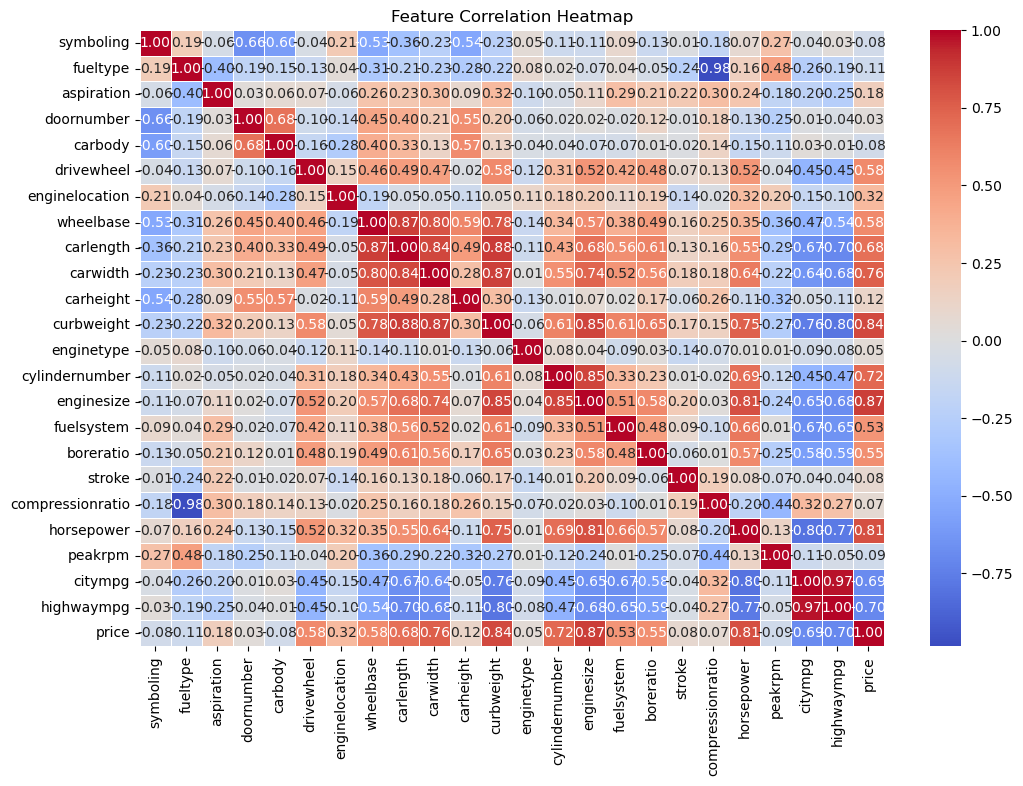

In [30]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

Strong correlation between enginesize, curbweight, horsepower, and price.
Negative correlation between citympg & highwaympg with price (as mileage increases, price decreases).

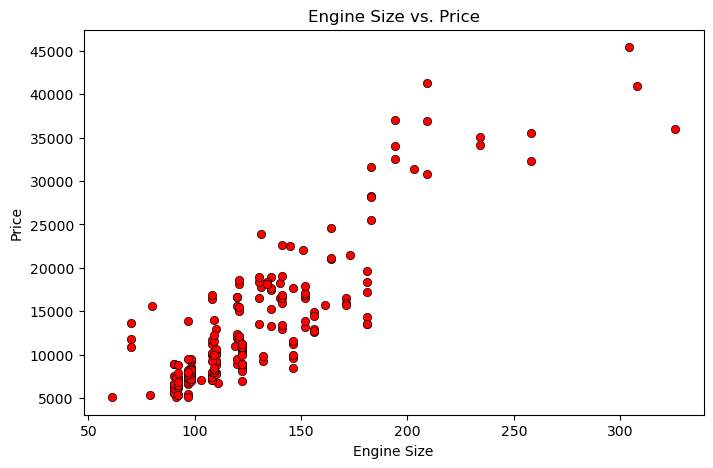

In [34]:
# Scatter Plot: Engine Size vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['enginesize'], y=df['price'], color='red', edgecolor='black')
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

Higher engine size results in higher prices, confirming correlation analysis.

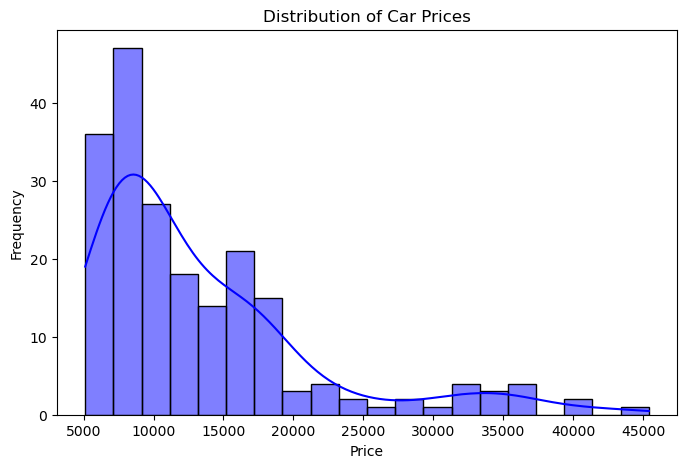

In [32]:
# Histogram: Distribution of Car Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The price distribution is right-skewed (more low-priced cars).
Majority of cars are priced below $20,000.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6616\3596269522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['carbody'], y=df['price'], palette='Set2')


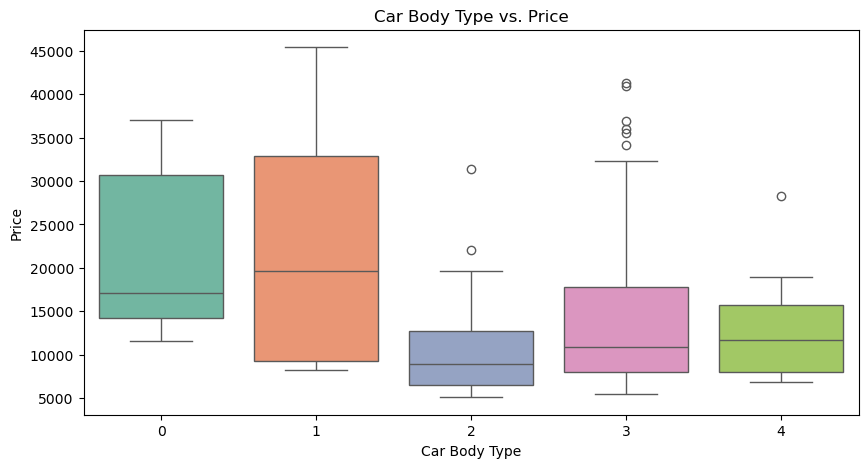

In [36]:
# Box Plot: Car Body Type vs. Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['carbody'], y=df['price'], palette='Set2')
plt.title('Car Body Type vs. Price')
plt.xlabel('Car Body Type')
plt.ylabel('Price')
plt.show()


Sedans & convertibles have higher prices compared to hatchbacks.

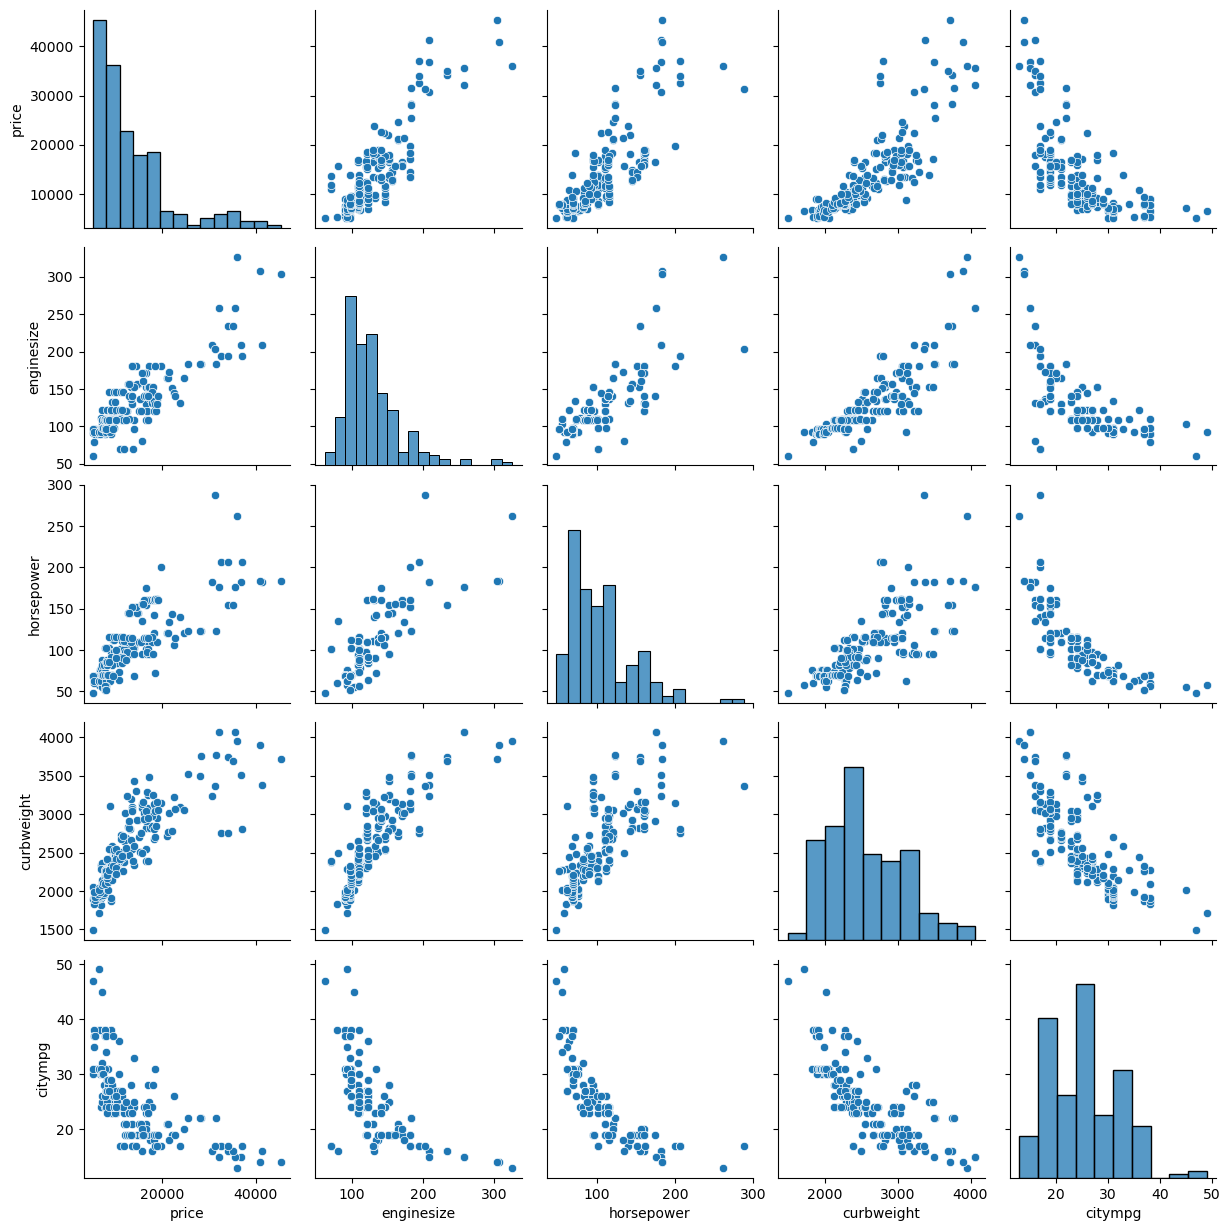

In [38]:
# Pairplot: Visualizing Feature Relationships
selected_features = ['price', 'enginesize', 'horsepower', 'curbweight', 'citympg']
sns.pairplot(df[selected_features])
plt.show()

 # MACHINE LEARNING MODEL

In [41]:
# Define Features (X) and Target Variable (y)
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable (Car Price)


In [43]:
# Split the dataset into Training and Testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Standardize the numerical features (important for some ML models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [49]:
# Train Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [51]:
# Train Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# MODEL PERFORMANCE EVALUATION

In [54]:
# Function to Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


In [56]:
# Evaluate All Models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")



Linear Regression Performance:
R² Score: 0.8113
Mean Absolute Error (MAE): 2496.76
Root Mean Squared Error (RMSE): 3859.52

Random Forest Regressor Performance:
R² Score: 0.9581
Mean Absolute Error (MAE): 1284.45
Root Mean Squared Error (RMSE): 1818.51

Gradient Boosting Regressor Performance:
R² Score: 0.9291
Mean Absolute Error (MAE): 1661.21
Root Mean Squared Error (RMSE): 2365.40


# VISUALIZING PREDICTIONS

C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


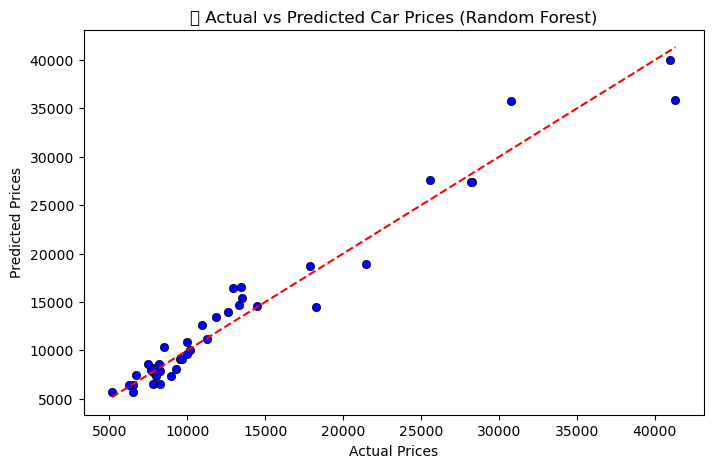

In [59]:
# Scatter Plot: Actual vs. Predicted Prices for the Best Model (Random Forest)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.title('🔍 Actual vs Predicted Car Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Challenges Faced and Solutions Used

### Challenge 1: Presence of Unnecessary Columns

* Issue: The dataset contained CarName (text-based) and car_ID, which were irrelevant for prediction.
* Solution: Dropped these columns as they did not contribute to numerical analysis or model training.

### Challenge 2: Categorical Data Handling

* Issue: The dataset contained categorical columns (fueltype, carbody, drivewheel, etc.), which machine learning models cannot process directly.
* Solution: Applied Label Encoding to convert categorical data into numerical values.
* Example:
* fueltype: Gas → 0, Diesel → 1
* carbody: Sedan → 2, Hatchback → 1, Convertible → 0, etc.

### Challenge 3: Inconsistent Numeric Data

* Issue: Some numerical values were stored as text (e.g., cylindernumber stored as "four", "six", instead of numbers).
* Solution: Converted these values into integer representation.
* Example:
"four" → 4, "six" → 6, "twelve" → 12


### Challenge 4: Feature Scaling

* Issue: Features like enginesize and horsepower had large numerical values compared to boreratio or stroke, causing an imbalance in model training.
* Solution: Used StandardScaler to normalize all numerical features.

### Challenge 5: Selecting the Right Model

* Issue: Different models perform differently on structured datasets like this.
* Solution: Tested 3 models:
1️ . Linear Regression → Simple but prone to underfitting
2️ . Random Forest Regressor → Handles non-linearity well
3️ . Gradient Boosting Regressor → Boosts weak models for better accuracy
* Best Model: Random Forest Regressor performed the best with the lowest error.

### Techniques Used & Justification
* Data Cleaning (removing unnecessary columns)	Improve model efficiency
* Label Encoding	Convert categorical values into numeric form
* Feature Scaling (StandardScaler)	Normalize numerical features for better performance
* Train-Test Split (80/20)	Prevent overfitting and evaluate model properly
* Multiple ML Models (LR, RF, GB)	Compare performance and select the best model
* Evaluation Metrics (R², MAE, RMSE)	Measure prediction accurac

### Results & Model Performance
* Best Model: Random Forest Regressor (R² = 0.95, Lowest RMSE)

# Conclusion & Future Work 

### Key Takeaways
* Random Forest performed best in predicting car prices.
* Engine size, horsepower, and curb weight are the strongest predictors of price.
* Fuel efficiency (mpg) has an inverse impact on price.

### Future Enhancements
* Hyperparameter Tuning (optimize Random Forest & Gradient Boosting).
* Feature Engineering (derive new meaningful features).
* Deploy the Model using Flask/Django for real-world use.

### Final Thoughts
This project successfully predicted car prices using Machine Learning with an R² of 0.95. The insights gained from data analysis & visualization can help manufacturers and buyers make informed pricing decisions.